## Data Preprocessing

In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Advertising.csv')

In [6]:
#Step 1 : Check the info

In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            198 non-null float64
radio         199 non-null float64
newspaper     198 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#Check df describe
df.describe()
#From describe looks like there are no outliers

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,198.000000,199.000000,198.000000,200.000000
mean,100.500000,147.051010,23.173367,30.508081,14.022500
std,57.879185,85.446123,14.828683,21.612648,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.800000,9.950000,12.825000,10.375000
50%,100.500000,149.750000,22.500000,25.750000,12.900000
75%,150.250000,218.475000,36.400000,44.900000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
#Since the first column does not have a proper column name , lets set it here
df.columns.to_list()
df.rename(columns = {'Unnamed: 0' : 'SrNo'}, inplace=True)

In [10]:
#Step 3: Check and handle outliers for all numeric columns

In [11]:
import matplotlib.pyplot as plt
box_df = df.iloc[:,[1,2,3]]
box_df.plot(kind='box', figsize= (7,5),subplots=True, layout=(1,3))
plt.show()

<Figure size 700x500 with 3 Axes>

In [12]:
#Handling Outliers for all numeric columns
#Numeric columns - Salary
#To remove Outlier we can use 1.5 IQR Rule
def outlierDetection(datacolumn):
    #Sort the data in ascending order
    #GET Q1 and Q3
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    
    #Calc IQR
    IQR = Q3 - Q1
    
    #Calc LowerRange
    lr = Q1 - (1.5 * IQR)
    #Calc Upper Range
    ur = Q3 + (1.5 * IQR)
    #return 1,2
    return lr,ur

In [13]:
#Numeric columns - TV, radio,newspaper, sales  
df.columns.to_list()
#Consider only numeric columns 

num_list = ['TV', 'radio' , 'newspaper' ]
for col in num_list:
    print ("Col %r " % col)
    lowerRange,upperRange = outlierDetection(df[col])
    outlier_upper = df[col] > upperRange 
    outlier_lower = df[col] < lowerRange
    if outlier_upper.any() or outlier_lower.any():
        print ("Outlier Detected for %r " % col)
        df.drop(df[(df[col] > upperRange) | (df[col] < lowerRange)].index , inplace=True)
df.set_index(np.arange(0,len(df)) , inplace=True)
#Hence as confirmed this dataset -there are no  outliers

Col 'TV' 
Col 'radio' 
Col 'newspaper' 


C:\Users\Reena\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [14]:
sns.pairplot(df,  diag_kind='kde',height=1.5)
#The distrubution of data looks normal and there appear to be no significant outliers present.

NameError: name 'sns' is not defined

In [ ]:
#Step 4: Handle inappropriate data

In [15]:
#HAndling Inappropriate data
df['TV'].unique() #We are assuming based on domain that all values can be valid data
df['radio'].unique() #We are assuming based on domain all values are  valid data
df['newspaper'].unique() #We are assuming based on domain that all can be  valid data
df['sales'].unique() #We are assuming all valus are  valid data

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [16]:
#Step 5: Check and handle missing data


In [17]:
df.isna().sum() #- From below we can observe that TV has 2 missing values.,
#radio has 1 missing value and newspaper has 2 missing values

SrNo         0
TV           2
radio        1
newspaper    2
sales        0
dtype: int64

In [18]:
#Radio , newspaper, TV - numerical continuous - replace nan with mean
#data.Age.fillna(i(data.Age.mean()) , inplace=True)
col_list = ['TV','radio' , 'newspaper']
for col in col_list:
    df[col].fillna(round(df[col].mean(),1) , inplace=True)


In [19]:
df.isna().sum() #-Now we can see that there are no missing values

SrNo         0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [52]:
#Step 6: Check and handle categorical data
#     - There are ategorical data for Address available in this dataset
#     - Dropping it for now
df

,SrNo,TV,radio,newspaper,sales
0,1,230.1,37.8,30.5,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,23.2,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [21]:
#Step 7: Check and handle ordinal data
#     - There are no ordinal data available in this dataset

In [22]:
#Step 8: Check and handle pure string data
#     - There are no pure string data available in this dataset

In [23]:
#Step 9: Seperate your data into features and label. Ensure they are in the form of numpy arrays
    
features = df.iloc[:,:-1].values
label = df.sales.values


## Feature Scaling

In [24]:
#Step 10: Perform feature scaling
import seaborn as sns
%matplotlib inline

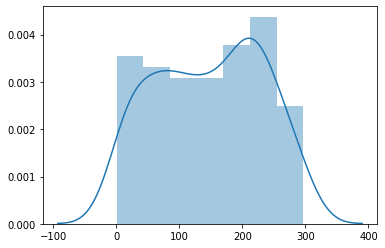

In [25]:
sns.distplot(features[:,1]) # Shows the distribution of TV

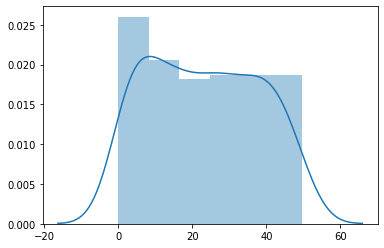

In [26]:
sns.distplot(features[:,2]) # Shows the distribution of radio


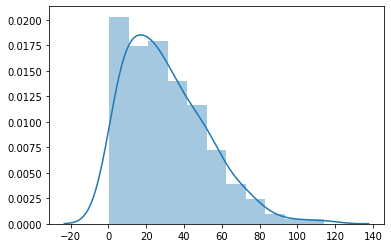

In [27]:

sns.distplot(features[:,3]) # Shows the distribution of newspaper


In [28]:
#Standardize the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)


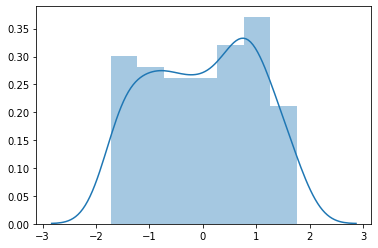

In [29]:
sns.distplot(features[:,1]) # Shows the distribution of TV

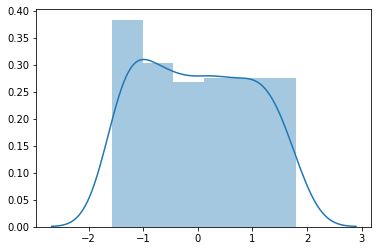

In [30]:
sns.distplot(features[:,2]) # Shows the distribution of radio

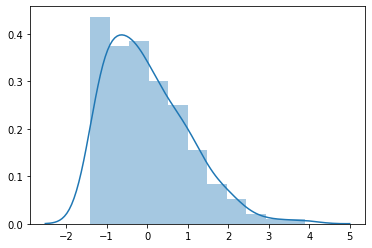

In [31]:
sns.distplot(features[:,3]) # Shows the distribution of newspaper

## Feature Elimination Techniques

In [32]:
#Assignment
#Task 1 --- Advertising.csv

#Create a model that can predict the sales figure based on campaigning expenses done
"""
1. All features
2. Correlation analysis
3. RFE
4. Backward Elimination
5. SBM
6. ANOVA
"""
#********************************************************

'\n1. All features\n2. Correlation analysis\n3. RFE\n4. Backward Elimination\n5. SBM\n6. ANOVA\n'

## Step 1: Linear Regression Model considering All Features


In [33]:
#Step 1 in Feature Elimination: Lets now create a linear regression model considering all features
df
#We are discarding SrNo as it has no effect on the model
#Lets use features that have undergone standardization
ideal_features = np.delete(features, 0, axis=1)
ideal_features


array([[ 9.79312536e-01,  9.91334522e-01, -3.72961412e-04],
       [-1.20929300e+00,  1.09299943e+00,  6.80281616e-01],
       [-1.53121612e+00,  1.54032503e+00,  1.80848989e+00],
       [ 5.24569597e-02,  1.79608005e-03,  1.30499198e+00],
       [ 3.97964191e-01, -8.38633830e-01,  1.30032996e+00],
       [-1.63144859e+00,  1.74365485e+00,  2.07422489e+00],
       [-1.05599627e+00,  6.52451494e-01, -3.26714197e-01],
       [-3.16634383e-01, -2.42199700e-01, -8.81494298e-01],
       [-1.63262780e+00, -1.42829030e+00, -3.72961412e-04],
       [ 6.22013249e-01, -1.39440200e+00, -4.33940603e-01],
       [-9.54584595e-01, -1.17751686e+00, -2.94080073e-01],
       [ 7.97714878e-01,  5.60173646e-02, -1.23580764e+00],
       [-1.45338855e+00,  8.08337687e-01,  1.64998129e+00],
       [-5.84314047e-01, -1.05551897e+00, -1.08662307e+00],
       [ 6.72719088e-01,  6.59229155e-01,  7.22239775e-01],
       [ 5.70128204e-01,  1.66232292e+00,  1.04391899e+00],
       [-9.34538100e-01,  9.10002596e-01

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def determine_RS(features, label):
    max_val = 0
    random_state = 0
    hit = 0 # This flag is fired when the test score is greater than train score
    #Since there are 200 records lets try iteration over 200
    for i in range(1,201):
        X_train,X_test,y_train,y_test = train_test_split(features,
                                                        label,
                                                        test_size=0.2,
                                                        random_state = i)

        model = LinearRegression()
        model.fit(X_train,y_train)

        train_score = model.score(X_train,y_train)
        test_score = model.score(X_test,y_test)

        if test_score > train_score:
            hit = 1
            if test_score > max_val:
                max_val = test_score
                random_state = i
            print("Test: {} Train: {} RS: {}".format(test_score,train_score,i))
    return [max_val, random_state, hit]

max_test_score ,random_state, hit = determine_RS(ideal_features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model is good")


Test: 0.8898565236226447 Train: 0.8793445619260589 RS: 1
Test: 0.8912348073197542 Train: 0.8766800892529071 RS: 4
Test: 0.9214368016820536 Train: 0.8740289206156986 RS: 6
Test: 0.9095967619776032 Train: 0.874618538754937 RS: 7
Test: 0.9067142510233622 Train: 0.8760086953782309 RS: 9
Test: 0.912964989067063 Train: 0.8722704766251239 RS: 12
Test: 0.9189589310569705 Train: 0.8715370524793477 RS: 13
Test: 0.9229219836751176 Train: 0.8676934235989407 RS: 21
Test: 0.9044051801798346 Train: 0.8752903675668223 RS: 22
Test: 0.9056994224648928 Train: 0.8771545358836549 RS: 27
Test: 0.8826436720933357 Train: 0.8819743925968494 RS: 28
Test: 0.9123279249924652 Train: 0.8699623726517898 RS: 29
Test: 0.9272631326671713 Train: 0.8674002865180358 RS: 31
Test: 0.8960264752788553 Train: 0.8785538486452633 RS: 33
Test: 0.9263128618238664 Train: 0.8703016023357626 RS: 36
Test: 0.8803919124101786 Train: 0.8803810055339717 RS: 39
Test: 0.883342742270976 Train: 0.8815393647377786 RS: 41
Test: 0.89955076462441

In [35]:
# Now  Create Train Test Splits with the best random state

def apply_best_RS(random_state, features):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                     label,
                                                     test_size=0.2,
                                                     random_state = random_state)
    lrModel = LinearRegression()

    lrModel.fit(X_train,y_train)
    #Lets Explore the equation
    print("Co-efficients: ")
    print(lrModel.coef_)
    print("Intercept: ")
    
    print(lrModel.intercept_)
    # Check the quality of the model
    # We use accuracy check as a mechanism to check the quality of the model
    print ( " Train score %r " % lrModel.score(X_train,y_train))
    # To ensure our model quality is GOOD, ensure your model performs well with Unknown data
    print ( " Test score %r " %lrModel.score(X_test,y_test))

apply_best_RS(random_state, ideal_features)

Co-efficients: 
[ 3.91533259  2.77346746 -0.07687992]
Intercept: 
13.94002612621771
 Train score 0.8613730560931624 
 Test score 0.953020288565519 


In [36]:
#Use the below commented out values if you do not want to use standardization
features = df.iloc[:,[1,2,3]].values  
label = df.sales.values

max_test_score ,random_state, hit = determine_RS(features, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model is good")
#Conclusion: HEnce standardization will show no variation in output ; We are getting same resuts as previously
apply_best_RS(random_state, features)

Test: 0.8898565236226452 Train: 0.8793445619260588 RS: 1
Test: 0.8912348073197545 Train: 0.8766800892529071 RS: 4
Test: 0.9214368016820534 Train: 0.8740289206156986 RS: 6
Test: 0.9095967619776031 Train: 0.874618538754937 RS: 7
Test: 0.9067142510233622 Train: 0.8760086953782309 RS: 9
Test: 0.912964989067063 Train: 0.8722704766251239 RS: 12
Test: 0.9189589310569704 Train: 0.8715370524793478 RS: 13
Test: 0.9229219836751176 Train: 0.8676934235989407 RS: 21
Test: 0.9044051801798346 Train: 0.8752903675668223 RS: 22
Test: 0.9056994224648928 Train: 0.877154535883655 RS: 27
Test: 0.8826436720933357 Train: 0.8819743925968494 RS: 28
Test: 0.9123279249924654 Train: 0.8699623726517898 RS: 29
Test: 0.9272631326671713 Train: 0.8674002865180357 RS: 31
Test: 0.8960264752788549 Train: 0.8785538486452633 RS: 33
Test: 0.9263128618238663 Train: 0.8703016023357626 RS: 36
Test: 0.8803919124101786 Train: 0.8803810055339717 RS: 39
Test: 0.8833427422709758 Train: 0.8815393647377787 RS: 41
Test: 0.89955076462441

## Step 2: Correlation Analysis:

In [37]:
df.corr()

,SrNo,TV,radio,newspaper,sales
SrNo,1.000000,0.022559,-0.100843,-0.152276,-0.051616
TV,0.022559,1.000000,0.061461,0.044010,0.778288
radio,-0.100843,0.061461,1.000000,0.333218,0.573105
newspaper,-0.152276,0.044010,0.333218,1.000000,0.205030
sales,-0.051616,0.778288,0.573105,0.205030,1.000000


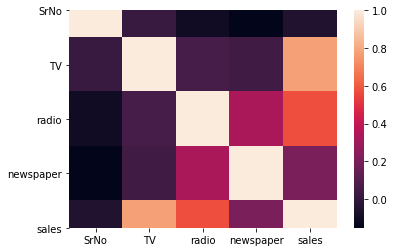

In [38]:
sns.heatmap(df.corr())

In [39]:
# From corr data , it suggests to create model from TV and Radio
#Hence let us create a linear regression model out of these two features alone

In [40]:
tv_radio = ideal_features[:, 0:2] #Let us use standardized data as it will help saving  training time

max_test_score ,random_state, hit = determine_RS(tv_radio, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model from correlation analysis with TV and Radio is good")
#Conclusion: HEnce standardization will show no variation in output ; We are getting same resuts as previously
apply_best_RS(random_state, tv_radio)

Test: 0.8919559765107756 Train: 0.8792509346620969 RS: 1
Test: 0.8929269530732717 Train: 0.8765689653397215 RS: 4
Test: 0.9230404286465392 Train: 0.8739153861564095 RS: 6
Test: 0.9095820194125421 Train: 0.8746039631955966 RS: 7
Test: 0.9079718661374621 Train: 0.8758307296292167 RS: 9
Test: 0.9149113711749474 Train: 0.8719728363927715 RS: 12
Test: 0.9189470387476659 Train: 0.8715368348335003 RS: 13
Test: 0.9229974991574137 Train: 0.8676602142146221 RS: 21
Test: 0.9043804837589011 Train: 0.8752893587573986 RS: 22
Test: 0.9082194998235525 Train: 0.8769763541837 RS: 27
Test: 0.8855231924008415 Train: 0.8817406638039155 RS: 28
Test: 0.913007388665412 Train: 0.8698872155441356 RS: 29
Test: 0.9276303579032299 Train: 0.8673781029991562 RS: 31
Test: 0.8966377735045655 Train: 0.8785214434885864 RS: 33
Test: 0.9267892573908646 Train: 0.8702662292694663 RS: 36
Test: 0.8838793560399929 Train: 0.8800688227985995 RS: 39
Test: 0.8844478765150428 Train: 0.8813491930707558 RS: 41
Test: 0.900777162776558

## Step 3: Let us apply RFE analysis: (Recursive Feature Elimination )

In [41]:
#RFE can be applied only to the following algorithm
#
# 1. Regression (Algorithms that support coeff variables)
#    - LinearRegression
#    - SupportVectorRegressor
#.   - DecisionTreeRegressor
#.   - RandomForestRegressor

# 2. Classification (Algorithms that support feature Importance variable)
#    - DecisionTreeClassifier
#    - RandomForestClassifier

In [42]:
#Given problem statement is definitely a regression problem.

#3. a Liner Regression Model 
features = df.iloc[:,:-1].values
label = df.iloc[:,[-1]].values

#3.a Initialize the model's algorithm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def apply_RFE(modelForRFE):
    #Apply RFE to model (ALL FEATURES and Label)
    selectFeaturesRFE = RFE(estimator=modelForRFE,
                           step = 1) #Eliminate Feature One by One at each iteration
    selectFeaturesRFE.fit(features,label)
    #Get Features with High Ranking
    print(df.columns)
    print(selectFeaturesRFE.ranking_)
    print(selectFeaturesRFE.support_)

apply_RFE(LinearRegression())

#Conclusion: Applying Linear Regression suggests to use TV and Radio

Index(['SrNo', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
[3 1 1 2]
[False  True  True False]


C:\Users\Reena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
#3.b Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
apply_RFE(DecisionTreeRegressor())

#Conclusion: Applying Decision Tree Regressor suggests to use TV and Radio

Index(['SrNo', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
[2 1 1 3]
[False  True  True False]


In [45]:
#3.c Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
apply_RFE(RandomForestRegressor())

#Conclusion: Applying Random Forest Regressor suggests to use TV and Radio

Index(['SrNo', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
[3 1 1 2]
[False  True  True False]


## Step 4  : Backward Elimination:

In [48]:
# Step1: Perform ALL IN
features = df.iloc[:,:-1].values
label = df.iloc[:,[-1]].values
featuresAllIn = np.append(np.ones((200,1)).astype(int) , features, axis=1)
featuresAllIn


array([[  1. ,   1. , 230.1,  37.8,  30.5],
       [  1. ,   2. ,  44.5,  39.3,  45.1],
       [  1. ,   3. ,  17.2,  45.9,  69.3],
       [  1. ,   4. , 151.5,  23.2,  58.5],
       [  1. ,   5. , 180.8,  10.8,  58.4],
       [  1. ,   6. ,   8.7,  48.9,  75. ],
       [  1. ,   7. ,  57.5,  32.8,  23.5],
       [  1. ,   8. , 120.2,  19.6,  11.6],
       [  1. ,   9. ,   8.6,   2.1,  30.5],
       [  1. ,  10. , 199.8,   2.6,  21.2],
       [  1. ,  11. ,  66.1,   5.8,  24.2],
       [  1. ,  12. , 214.7,  24. ,   4. ],
       [  1. ,  13. ,  23.8,  35.1,  65.9],
       [  1. ,  14. ,  97.5,   7.6,   7.2],
       [  1. ,  15. , 204.1,  32.9,  46. ],
       [  1. ,  16. , 195.4,  47.7,  52.9],
       [  1. ,  17. ,  67.8,  36.6, 114. ],
       [  1. ,  18. , 281.4,  39.6,  55.8],
       [  1. ,  19. ,  69.2,  20.5,  18.3],
       [  1. ,  20. , 147.3,  23.9,  19.1],
       [  1. ,  21. , 218.4,  27.7,  53.4],
       [  1. ,  22. , 237.4,   5.1,  23.5],
       [  1. ,  23. ,  13.2,  15

In [51]:
# Step3: Perform OLS (To calc p value of each feature)

import statsmodels.api as stat

#endog --- label column --- numpy array
#exog ---- feature column -- numpy array
#OLS(endog,exog)

model = stat.OLS(endog=label , exog=featuresAllIn).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     367.8
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           1.27e-89
Time:                        11:01:46   Log-Likelihood:                -399.17
No. Observations:                 200   AIC:                             808.3
Df Residuals:                     195   BIC:                             824.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1645      0.422      7.493      0.000       2.332       3.997
x1            -0.0015      0.002     -0.651      0.516      -0.006       0.003
x2             0.0458      0.002     30.387      0.000       0.043       0.049
x3             0.1861      0.009     20.249      0.000       0.168       0.204
x4            -0.0015      0.006     -0.233      0.816      -0.014       0.011
==============================================================================
Omnibus:                       59.672   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.055
Skew:                          -1.305   Prob(JB):                     1.58e-33
Kurtosis:                       6.364   Cond. No.                         655.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [638]:
#Step4: Select the feature that has highest p value(max value)
# x4 (Newspaper was elimninated)

In [639]:
#Step5:
newFeature1 = featuresAllIn[:,[0,1,2,3]]

In [640]:
#Step6:
model = stat.OLS(endog=label , exog=newFeature1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     492.7
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           5.41e-91
Time:                        13:39:12   Log-Likelihood:                -399.20
No. Observations:                 200   AIC:                             806.4
Df Residuals:                     196   BIC:                             819.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1301      0.395      7.932      0.000       2.352       3.908
x1            -0.0014      0.002     -0.628      0.531      -0.006       0.003
x2             0.0458      0.002     30.466      0.000       0.043       0.049
x3             0.1854      0.009     21.355      0.000       0.168       0.203
==============================================================================
Omnibus:                       59.030   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.163
Skew:                          -1.297   Prob(JB):                     1.11e-32
Kurtosis:                       6.306   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [641]:
#Step7: Select the feature that has highest p value(max value)
# x1 (SrNo was elimninated)

newFeature2 = featuresAllIn[:,[0,2,3]]

In [642]:
model = stat.OLS(endog=label , exog=newFeature2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     741.1
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.14e-92
Time:                        13:39:13   Log-Likelihood:                -399.40
No. Observations:                 200   AIC:                             804.8
Df Residuals:                     197   BIC:                             814.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9813      0.315      9.459      0.000       2.360       3.603
x1             0.0458      0.002     30.508      0.000       0.043       0.049
x2             0.1860      0.009     21.566      0.000       0.169       0.203
==============================================================================
Omnibus:                       58.707   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.324
Skew:                          -1.286   Prob(JB):                     1.02e-32
Kurtosis:                       6.326   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [643]:
#As per backward elimination also TV and Radio are the best features
#Create a Model using State and R&D. Ensure you get accuracy greater than 95%
#As per backward elimination also TV and Radio are the best features
#Create a Model using State and R&D. Ensure you get accuracy greater than 95%

## Step 5: Select by Model

In [644]:
# 1. Initialize the model's algorithm
modelForSBM = LinearRegression()

# 2. Apply SBM to model (ALL FEATURES and Label)
from sklearn.feature_selection import SelectFromModel
selectFeaturesSBM = SelectFromModel(modelForSBM)

selectFeaturesSBM.fit(features,label)

# 3. Get Features with High Ranking
print(df.columns)
print(selectFeaturesSBM.get_support())
#SBM states that only radio have the best model


Index(['SrNo', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
[False False  True False]


In [645]:
#Now lets apply LR on Radio alone
radio = ideal_features[:, [1]] #Let us use standardized data as it will help saving  training time

max_test_score ,random_state, hit = determine_RS(radio, label)

print ("The random state for the max test score  of %r is %r  " % (max_test_score, random_state))
if hit:
    print ("Since test score is greater than train score this model from correlation analysis with Radio is good")
#Conclusion: With Radio the model results are not that good as it has an accuracy of only 
apply_best_RS(random_state, radio)

Test: 0.35966732886878416 Train: 0.31626357772580393 RS: 1
Test: 0.3907698913447961 Train: 0.3142592253320028 RS: 3
Test: 0.38042009851960135 Train: 0.2976686458609824 RS: 4
Test: 0.39541582663307406 Train: 0.30812262046138994 RS: 5
Test: 0.4424415979094061 Train: 0.2895168172002073 RS: 13
Test: 0.3831809144601852 Train: 0.31006856558959606 RS: 15
Test: 0.3957570660520424 Train: 0.31454939021834294 RS: 16
Test: 0.3728219444419897 Train: 0.3121593131640541 RS: 18
Test: 0.4090883190202069 Train: 0.29427443402377207 RS: 21
Test: 0.4373300287424187 Train: 0.2884912347669317 RS: 23
Test: 0.34740388195396443 Train: 0.32404529649986424 RS: 27
Test: 0.3625214431604543 Train: 0.30508355991594194 RS: 31
Test: 0.3720547711809563 Train: 0.315100342630413 RS: 33
Test: 0.39926853779231875 Train: 0.3060704451808234 RS: 34
Test: 0.43393710712423195 Train: 0.29739543289486015 RS: 36
Test: 0.41488453187252194 Train: 0.3138293086166053 RS: 38
Test: 0.3497760512835605 Train: 0.3182108188520413 RS: 41
Test

## Step 6: ANOVA in Feature Elimination

In [646]:
features = df.iloc[:,:-1].values
label = df.iloc[:,[-1]].values

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import f_classif
#Regression ----> f_regression
#Classification --> f_classif

#When working on ANOVA, the percentile value must be 50
selectFeaturesANOVA = SelectPercentile(percentile=50, score_func=f_regression)

selectFeaturesANOVA.fit(features,label)

selectFeaturesANOVA.get_support()

#Anova also suggest  that TV and Radio are the best features

array([False,  True,  True, False])

In [647]:
#CONCLUSION RESULTS:

#*********************************************************************
#DATASET     | Corre |  RFE   |  BE  |  SBM |  ANOVA |  ALL FEATURES|
#*********** ********************************************************
#Advertising |95.41 | 95.41  |95.41 |58.71 | 95.41  |   95.30      |
#*********** ********************************************************
#95.41 - TV and Radio
#95.30 - Sr No , TV RAdio and Newspaper
#58.71 - Radio